### 1. Load Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

### 2. Load synthetic dataset using make_classification

In [2]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=2, n_redundant=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.80, random_state=124
)

In [3]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.675885,0.190770,-0.456531,0.011329,0.048797,0.667737,-1.103441,-0.970145,-0.732858,0.051798,1.130455,-0.503714,0.631423,0.045444,-0.949875,0.621580,-0.544659,0.042097,0.104727,-1.059297
1,0.422764,0.590766,0.628581,0.793824,0.878442,0.127815,-0.763092,-0.247718,0.652983,-0.744198,-0.130855,-0.092504,-0.401896,1.011170,0.312020,0.627986,1.332877,0.797387,-0.628881,-1.098104
2,-2.642366,-0.521139,0.762671,-1.384697,-1.431009,0.810150,0.482957,-2.268099,-3.212280,1.472500,3.391374,-1.242069,0.627650,-2.598496,-3.210163,0.615912,0.134685,1.123998,1.414605,2.107199
3,-1.315028,-1.542378,-0.229398,-2.136239,-2.354523,0.196175,0.130585,0.415251,-1.950237,2.018927,0.646613,0.118282,-1.293345,-0.121978,-1.087852,-1.530641,0.679753,-0.494655,1.721935,-2.364971
4,1.179410,-0.169909,1.480127,0.164056,0.123477,-1.906977,-1.398834,1.496756,1.323489,-0.253759,-1.840370,0.785428,0.092887,0.820499,1.592766,-0.851276,-0.573789,-4.829436,-0.312053,1.772016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1.279005,-0.703286,-0.059938,-0.407501,-0.530487,-1.635640,0.161011,2.247761,1.293025,0.245088,-2.416973,1.149663,-1.517891,-0.412410,1.933481,-1.666360,2.117058,-0.504308,0.073384,0.969559
79996,-1.709490,-0.646588,0.704615,-1.244846,-1.321894,-0.386591,0.777350,-1.094975,-2.162990,1.262819,1.942956,-0.625954,0.217728,0.655818,-1.953888,-0.044614,-0.006527,0.890221,1.160685,-0.330361
79997,-0.182043,-0.013406,0.326131,-0.070022,-0.069790,0.234515,-0.511089,-0.183333,-0.215142,0.078895,0.251902,-0.098484,-0.880230,0.937270,-0.230099,0.074647,1.019206,-1.360448,0.079609,-1.124846
79998,-0.627489,1.780908,1.907281,1.819436,2.098268,0.597676,-0.991465,-2.830726,-0.240904,-1.559564,2.350995,-1.388187,0.586518,-0.628593,-1.519059,2.873554,0.814021,-0.941098,-1.175197,0.116436


### 3. Fit Logistic Regression Model

In [4]:
lr = LogisticRegression()

model_lr = lr.fit(X_train,y_train)

In [5]:
y_pred = model_lr.predict(X_test)

y_pred

array([0, 1, 0, ..., 0, 0, 1])

### 4. Model evaluation

In [6]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34762,  5223],
       [ 5332, 34683]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

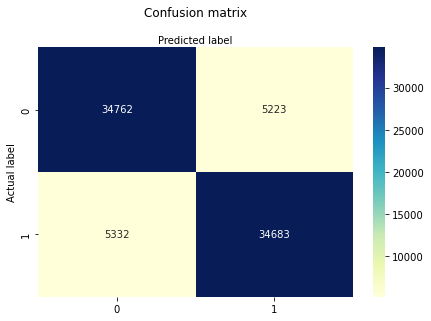

In [7]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Question: Part(a): Now that we have computed confusion matrix above, please plot the ROC AUC chart below

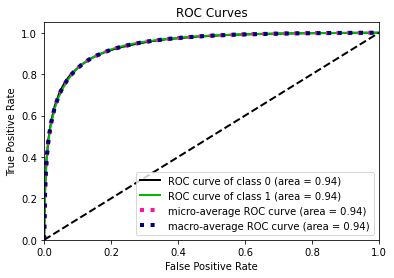

In [8]:
import scikitplot as skplt

predicted_probas = model_lr.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

Question: Part(b): Compute Youden J Statistics

In [9]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted_probas[:,1], drop_intermediate=False)
def cutoff_youdens_j(fpr, tpr, thresholds):
    j_scores = tpr - fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]
cutoff_youdens_j(fpr, tpr, thresholds)

0.4942905558718871